## 1: Introduction

The purpose of this analysis is to examine whether employee attrition differs between male and female employees in the IBM HR dataset. 

Attrition refers to whether an employee has left the company (Yes) or stayed (No). By comparing attrition rates across genders, I aim to identify whether there are noticeable differences in retention patterns.


## 2: Import Libraries

In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
import os
os.getcwd()


'C:\\Users\\venud\\DATA6550'

## 3: Load the Dataset


In [54]:
df = pd.read_csv("data/HR_Employee_Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 4: Basic Dataset Information

Here, I check the number of rows and columns in the dataset to understand its size.


In [57]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 1470
Number of columns: 35


## 5: Checking for Missing Values

Since this analysis focuses on Gender and Attrition, I verify that these columns do not contain missing values.


In [60]:
df[["Gender", "Attrition"]].isna().sum()


Gender       0
Attrition    0
dtype: int64

## 6: Overall Attrition Distribution

Before comparing genders, I examine the overall attrition distribution in the dataset.


In [63]:
df["Attrition"].value_counts()
(df["Attrition"].value_counts(normalize=True) * 100).round(2)


Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

## 7: Gender Distribution

This section shows how employees are distributed across genders.


In [66]:
df["Gender"].value_counts()


Gender
Male      882
Female    588
Name: count, dtype: int64

## 8: Gender vs Attrition 

I create a cross tabulation to compare attrition counts between male and female employees.


In [69]:
gender_attrition_counts = pd.crosstab(df["Gender"], df["Attrition"])
gender_attrition_counts


Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


## 9: Attrition Rate by Gender (Percentage)

To better compare groups, I calculate attrition rates as percentages rather than raw counts.


In [72]:
gender_attrition_rate = pd.crosstab(
    df["Gender"], 
    df["Attrition"], 
    normalize="index"
) * 100

gender_attrition_rate = gender_attrition_rate.round(2)
gender_attrition_rate


Attrition,No,Yes
Gender,,
Female,85.20,14.80
Male,82.99,17.01


## Visualization 1: Attrition Rate by Gender

This chart compares attrition rates between male and female employees using percentages.


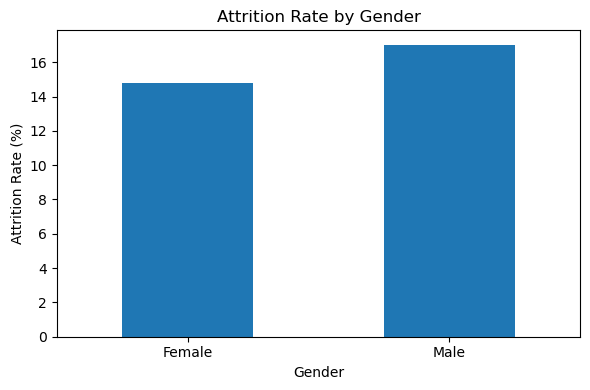

In [75]:
gender_attrition_rate = pd.crosstab(
    df["Gender"], 
    df["Attrition"], 
    normalize="index"
) * 100

gender_attrition_rate = gender_attrition_rate.round(2)

attrition_yes_rate = gender_attrition_rate["Yes"]

plt.figure(figsize=(6,4))
attrition_yes_rate.plot(kind="bar")
plt.title("Attrition Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Visualization 2: Attrition Distribution by Gender

This stacked bar chart shows the number of employees who stayed and left across genders.


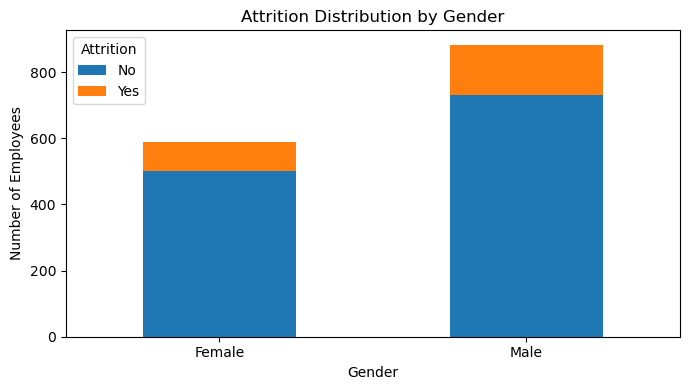

In [78]:
gender_attrition_counts = pd.crosstab(df["Gender"], df["Attrition"])

gender_attrition_counts.plot(kind="bar", stacked=True, figsize=(7,4))

plt.title("Attrition Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Visualization 3: Attrition by Gender and Overtime

This chart examines whether overtime status influences attrition differently across genders.


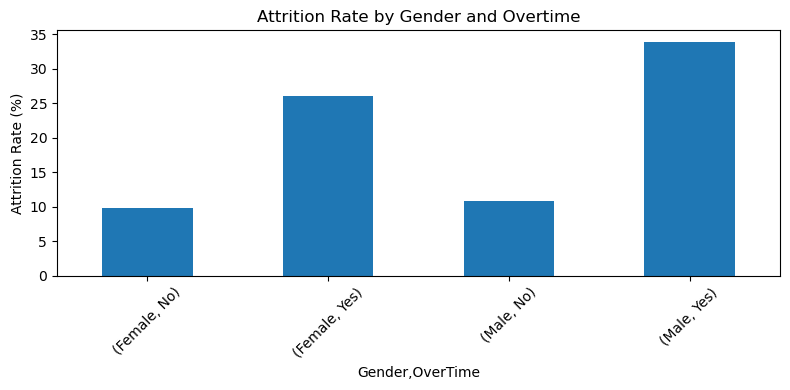

In [81]:
gender_overtime_attrition = pd.crosstab(
    [df["Gender"], df["OverTime"]],
    df["Attrition"],
    normalize="index"
) * 100

gender_overtime_attrition = gender_overtime_attrition.round(2)

gender_overtime_attrition["Yes"].plot(kind="bar", figsize=(8,4))

plt.title("Attrition Rate by Gender and Overtime")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualization 4: Attrition Rate by Age Group

In [84]:
# Create age groups

bins = [18, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
df[["Age", "AgeGroup"]].head()


,Age,AgeGroup
0,41,36-45
1,49,46-55
2,37,36-45
3,33,26-35
4,27,26-35


In [86]:
# Calculate attrition rate (percentage) by age group

age_attrition_rate = pd.crosstab(
    df["AgeGroup"],
    df["Attrition"],
    normalize="index"
) * 100

age_attrition_rate = age_attrition_rate.round(2)
age_attrition_rate


Attrition,No,Yes
AgeGroup,,
18-25,65.22,34.78
26-35,80.86,19.14
36-45,90.81,9.19
46-55,88.50,11.50
56+,82.98,17.02


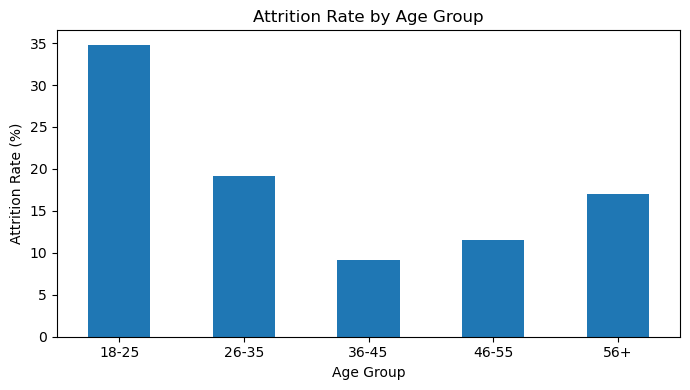

In [88]:
# Plot attrition rate for each age group

plt.figure(figsize=(7,4))

age_attrition_rate["Yes"].plot(kind="bar")

plt.title("Attrition Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Final Summary

This analysis examined whether employee attrition differs across gender and age groups using the IBM HR dataset. The goal was to identify whether certain demographic groups experience different retention outcomes within the organization.

The results show that attrition rates are not exactly the same across genders, suggesting that retention patterns may vary between male and female employees. In addition, when age groups were analyzed, differences in attrition rates were observed across career stages. Younger age groups appeared to experience different turnover patterns compared to older employees, which may reflect differences in career mobility, job expectations, or experience level.

While this dataset is fictional and the analysis is descriptive, the findings highlight how employment data can reveal patterns that are important when discussing workplace fairness. Gender and age alone do not explain why employees leave, but examining these factors helps identify potential disparities that may require further investigation. Overall, this project demonstrates how data analysis can be used to explore structural patterns in employee retention.

